<div>
<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<b></b>
<br>
<i><b>Docente:</b></i> Camilo Rodriguez.
<br>
<i><b>Asignatura:</b></i> PROCESAMIENTO DE DATOS.
<br>
<i><b>Estudiante:</b></i> Steven Sebastian Florido Paez.
<br>
<i><b>Estudiante:</b></i> Carlos Andres Rojas Rocha.
<br>
<i><b>Tema:</b></i> Parcial corte 3.
<br>
<i><b>27 Noviembre 2023 </b></i>
</FONT>
</div>

# **PARTE 1**

In [ ]:
from google.colab import drive

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import numpy as np
from scipy.stats import normaltest
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer, OneHotEncoder
from sklearn.impute import SimpleImputer
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta_archivo = '/content/drive/MyDrive/bank.csv'
df = pd.read_csv(ruta_archivo, sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


# **1. Crear transformación de imputación para cada uno de los tipos de variables.**

In [ ]:
# Dividir el DataFrame en variables numéricas y categóricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
# Imputación para variables numéricas
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = numeric_imputer.fit_transform(df[numeric_cols])

In [ ]:
# Imputación para variables categóricas
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])

# **2. Probar los respectivos escalados en los datos numéricos(maxMin,Standard, Robust)**

In [ ]:
# Escalado Max-Min (MinMax Scaling)
min_max_scaler = MinMaxScaler()
df[numeric_cols] = min_max_scaler.fit_transform(df[numeric_cols])

In [ ]:
df[numeric_cols].head()

,age,balance,day,duration,campaign,pdays,previous
0,0.161765,0.068455,0.600000,0.024826,0.000000,0.000000,0.00
1,0.205882,0.108750,0.333333,0.071500,0.000000,0.389908,0.16
2,0.235294,0.062590,0.500000,0.059914,0.000000,0.379587,0.04
3,0.161765,0.064281,0.066667,0.064548,0.061224,0.000000,0.00
4,0.588235,0.044469,0.133333,0.073486,0.000000,0.000000,0.00


In [ ]:
# Escalado Standard (Standard Scaling)
#standard_scaler = StandardScaler()
#df[numeric_cols] = standard_scaler.fit_transform(df[numeric_cols])

In [ ]:
#df[numeric_cols].head()

In [ ]:
# Escalado Robust (Robust Scaling)
#robust_scaler = RobustScaler()
#df[numeric_cols] = robust_scaler.fit_transform(df[numeric_cols])

In [ ]:
#df[numeric_cols].head()

# **3.	Determinar la mejor transformación categórica(onehot vs ordinal).**

In [ ]:
#One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols)

In [ ]:
#Ordinal Encoding
#ordinal_encoder = OrdinalEncoder()
#df['education'] = ordinal_encoder.fit_transform(df['education'])

# **4.	Hacer la distribución de las variables numéricas más Gaussianas.**

In [ ]:
# Aplicar Yeo-Johnson Transformation a las variables numéricas
yeo_johnson_transformer = PowerTransformer(method='yeo-johnson')
df[numeric_cols] = yeo_johnson_transformer.fit_transform(df[numeric_cols])

# **5.	 Crear un pipeline Numérico y otro Categórico. Unir ambos en un solo pipeline usando ColumnTransformer.**

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
# Pipeline numérico sin selección de características
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('yeo-johnson', PowerTransformer(method='yeo-johnson')),
    ('scaler', StandardScaler())
])

In [ ]:
# Pipeline categórico
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())
])

In [ ]:
# ColumnTransformer para unir ambos pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_cols),
        ('cat', categorical_pipeline, categorical_cols)
    ])

# **6.	Seleccionar variables más importantes y eliminar las restantes en el pipeline.**

In [ ]:
X_preprocessed = preprocessor.fit_transform(df)

# **7. Guardar el pipeline como joblib.**

In [ ]:
joblib.dump(preprocessor, 'preprocessor_pipeline.joblib')

['preprocessor_pipeline.joblib']

# **8.	 Cargar el pipeline y probarlo con un dato de entrada.**

In [ ]:
loaded_preprocessor = joblib.load('preprocessor_pipeline.joblib')

In [ ]:
input_data = pd.DataFrame({
    'age': [35],
    'balance': [1500],
    'day': [10],
    'duration': [250],
    'campaign': [3],
    'pdays': [40],
    'previous': [2],
    'job_admin.': [0],
    'job_blue-collar': [1],
    'job_entrepreneur': [0],
    'job_housemaid': [0],
    'job_management': [0],
    'job_retired': [0],
    'job_self-employed': [1],
    'job_services': [0],
    'job_student': [0],
    'job_technician': [0],
    'job_unemployed': [0],
    'job_unknown': [0],
    'marital_divorced': [0],
    'marital_married': [1],
    'marital_single': [0],
    'education_primary': [0],
    'education_secondary': [1],
    'education_tertiary': [0],
    'education_unknown': [0],
    'default_no': [1],
    'default_yes': [0],
    'housing_no': [0],
    'housing_yes': [1],
    'loan_no': [1],
    'loan_yes': [0],
    'contact_cellular': [1],
    'contact_telephone': [0],
    'contact_unknown': [0],
    'month_apr': [0],
    'month_aug': [1],
    'month_dec': [0],
    'month_feb': [0],
    'month_jan': [0],
    'month_jul': [0],
    'month_jun': [0],
    'month_mar': [0],
    'month_may': [0],
    'month_nov': [0],
    'month_oct': [0],
    'month_sep': [0],
    'poutcome_failure': [0],
    'poutcome_other': [1],
    'poutcome_success': [0],
    'poutcome_unknown': [0],
    'y_no': [0],
    'y_yes': [1]
})

In [ ]:
processed_data = loaded_preprocessor.transform(input_data)


print("Dato de entrada:")
print(input_data)

print("\nDato procesado:")
print(processed_data)

Dato de entrada:
   age  balance  day  duration  campaign  pdays  previous  job_admin.  \
0   35     1500   10       250         3     40         2           0   

   job_blue-collar  job_entrepreneur  ...  month_may  month_nov  month_oct  \
0                1                 0  ...          0          0          0   

   month_sep  poutcome_failure  poutcome_other  poutcome_success  \
0          0                 0               1                 0   

   poutcome_unknown  y_no  y_yes  
0                 0     0      1  

[1 rows x 53 columns]

Dato procesado:
[[ 31.85845426 361.08397087  10.60961078  98.603208     2.27523413
    2.17524409   2.12820003]]


# **PARTE 2**

In [ ]:
ruta_archivo = '/content/drive/MyDrive/hungary_chickenpox.csv'
df2 = pd.read_csv(ruta_archivo)
df2

,Date,BUDAPEST,BARANYA,BACS,BEKES,BORSOD,CSONGRAD,FEJER,GYOR,HAJDU,...,JASZ,KOMAROM,NOGRAD,PEST,SOMOGY,SZABOLCS,TOLNA,VAS,VESZPREM,ZALA
0,03/01/2005,168,79,30,173,169,42,136,120,162,...,130,57,2,178,66,64,11,29,87,68
1,10/01/2005,157,60,30,92,200,53,51,70,84,...,80,50,29,141,48,29,58,53,68,26
2,17/01/2005,96,44,31,86,93,30,93,84,191,...,64,46,4,157,33,33,24,18,62,44
3,24/01/2005,163,49,43,126,46,39,52,114,107,...,63,54,14,107,66,50,25,21,43,31
4,31/01/2005,122,78,53,87,103,34,95,131,172,...,61,49,11,124,63,56,7,47,85,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517,01/12/2014,95,12,41,6,39,0,16,15,14,...,56,7,13,122,4,23,4,11,110,10
518,08/12/2014,43,39,31,10,34,3,2,30,25,...,34,20,18,70,36,5,23,22,63,9
519,15/12/2014,35,7,15,0,0,0,7,7,4,...,30,36,4,72,5,21,14,0,17,10
520,22/12/2014,30,23,8,0,11,4,1,9,10,...,27,17,21,12,5,17,1,1,83,2


In [ ]:
df2['Date'] = pd.to_datetime(df2['Date'])

<ipython-input-84-feb01113be37>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df2['Date'] = pd.to_datetime(df2['Date'])


# **1. SERIE**

In [ ]:
df3 = df2.copy()

In [ ]:
df3.set_index('Date', inplace=True)

In [ ]:
df3.sort_index(inplace=True)

In [ ]:
df3_budapest = df3[['BUDAPEST']]

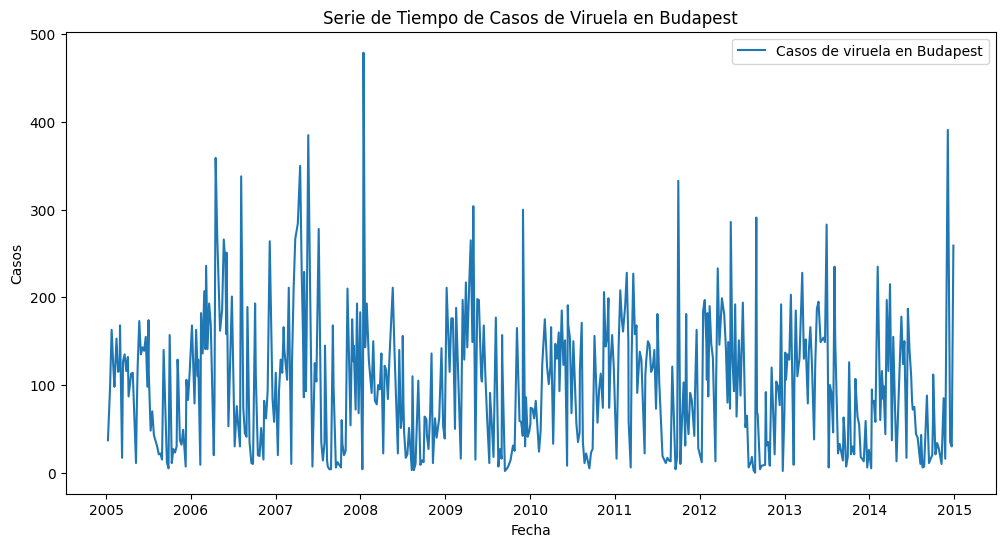

In [ ]:
# serie de tiempo
plt.figure(figsize=(12, 6))
plt.plot(df3_budapest, label='Casos de viruela en Budapest')
plt.title('Serie de Tiempo de Casos de Viruela en Budapest')
plt.xlabel('Fecha')
plt.ylabel('Casos')
plt.legend()
plt.show()

# **2. HISTOGRAMA**

In [ ]:
df2['Year'] = df2['Date'].dt.year

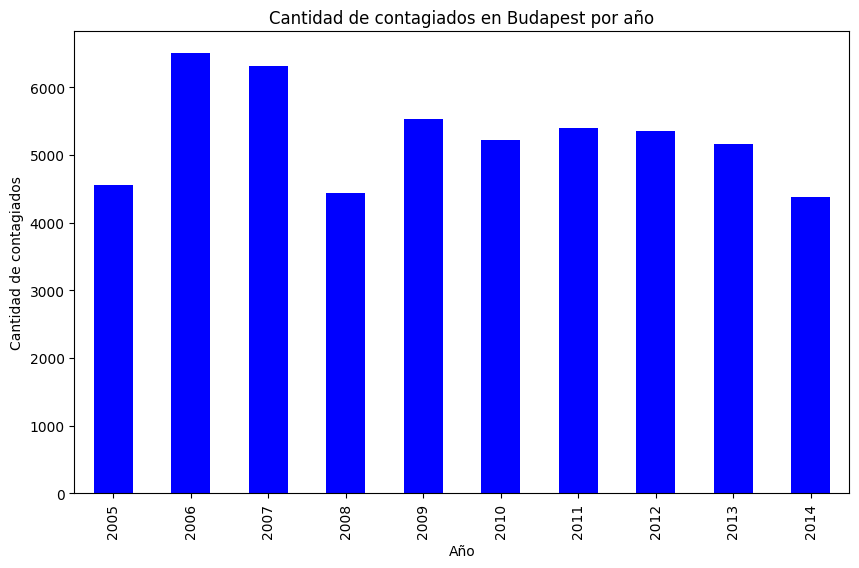

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
df2.groupby('Year')['BUDAPEST'].sum().plot(kind='bar', ax=ax, color='blue')
plt.title('Cantidad de contagiados en Budapest por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de contagiados')
plt.show()

# **3. Diagrama de cajas**

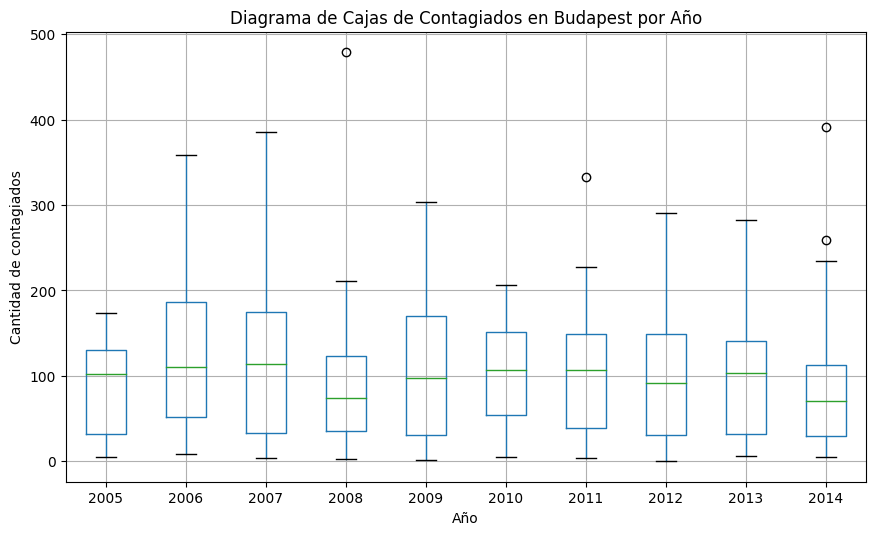

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
df2.boxplot(column='BUDAPEST', by='Year', ax=ax)
plt.title('Diagrama de Cajas de Contagiados en Budapest por Año')
plt.suptitle('')
plt.xlabel('Año')
plt.ylabel('Cantidad de contagiados')
plt.show()

# **4. Analisis de resultados**

Al analizar la tendencia de casos de viruela a lo largo de los años, se nota que en los primeros años había una tendencia al incremento, mientras que en los últimos años se observa una disminución en la incidencia de la enfermedad. Es interesante señalar que, a pesar de esta variación en la tendencia, el promedio de casos se mantiene estable. Cabe destacar que el año 2006 se destaca como el período con mayor cantidad de casos de viruela, en contraste con el año 2008, que registró el menor número de contagiados. Sin embargo, es relevante mencionar que durante este último año se experimentó un pico notable de casos en un día específico. Estos hallazgos sugieren una dinámica cambiante en la incidencia de la viruela a lo largo del tiempo, con variaciones notables en diferentes años.

# **5. Determinar si la serie es White Noise (revisar media, varianza  y auto correlaciones)**

In [ ]:
media = np.mean(df2['BUDAPEST'])
varianza = np.var(df2['BUDAPEST'])

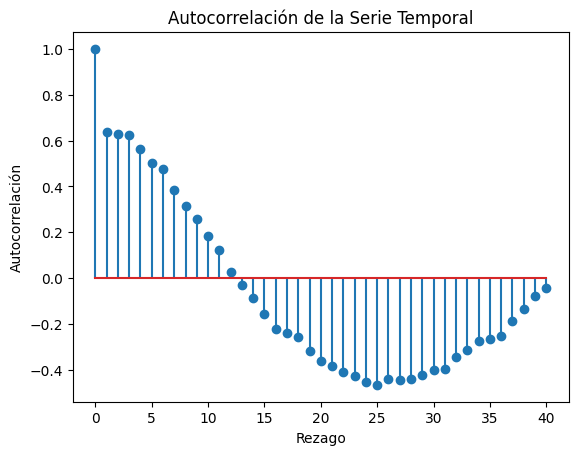

In [ ]:
acf_result = sm.tsa.acf(df2['BUDAPEST'], nlags=40)
plt.stem(acf_result)
plt.title('Autocorrelación de la Serie Temporal')
plt.xlabel('Rezago')
plt.ylabel('Autocorrelación')
plt.show()

In [ ]:
print(f'Media: {media}')
print(f'Varianza: {varianza}')

Media: 101.24521072796935
Varianza: 5818.8977261050195


In [ ]:
normality_test_stat, p_value = normaltest(df2['BUDAPEST'])
print(f'Estadística de la prueba de normalidad: {normality_test_stat}, p-valor: {p_value}')


if p_value > 0.05:
    print('La serie parece seguir una distribución normal.')
else:
    print('La serie no sigue una distribución normal.')


if all(abs(acf_result[1:]) < 0.05):
    print('Las autocorrelaciones son estadísticamente insignificantes, sugiriendo independencia.')
else:
    print('Existen autocorrelaciones estadísticamente significativas, sugiriendo posible dependencia.')

Estadística de la prueba de normalidad: 77.41866343857757, p-valor: 1.5443681489348846e-17
La serie no sigue una distribución normal.
Existen autocorrelaciones estadísticamente significativas, sugiriendo posible dependencia.


El p-valor de la prueba de normalidad es muy pequeño (1.54e-17), lo que significa que hay evidencia suficiente para rechazar la hipótesis nula de que la serie sigue una distribución normal. Esto indica que la serie no tiene una distribución normal y no se ajusta al comportamiento típico de un ruido blanco.
La observación de autocorrelaciones estadísticamente significativas sugiere posible dependencia entre los valores sucesivos de la serie. Esto va en contra de la propiedad de independencia que se espera en un ruido blanco.

# **6. Determinar si la serie es estacionaria**

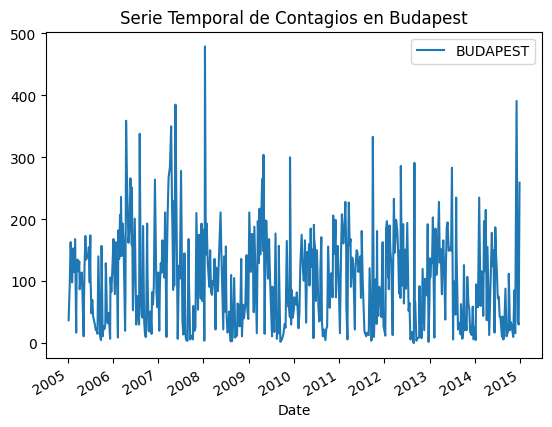

In [ ]:
df2.plot(x='Date', y='BUDAPEST', title='Serie Temporal de Contagios en Budapest')
plt.show()

In [ ]:
result = adfuller(df2['BUDAPEST'], autolag='AIC')

print('Estadística de la prueba:', result[0])
print('p-valor:', result[1])
print('Valores críticos:', result[4])
if result[1] <= 0.05:
    print('La serie es estacionaria (p-valor <= 0.05).')
else:
    print('La serie no es estacionaria (p-valor > 0.05).')

Estadística de la prueba: -6.9332180147467115
p-valor: 1.0708269234620892e-09
Valores críticos: {'1%': -3.443262740636999, '5%': -2.8672350350046787, '10%': -2.569803239025633}
La serie es estacionaria (p-valor <= 0.05).


La serie es estacionaria

# **7.  Realizar una regresión polinomial para modelar la temporalidad(Seasonality) y si es el caso, la tendencia.**

In [ ]:
df2['NumericDate'] = np.arange(len(df2))

In [ ]:
X = df2['NumericDate'].values.reshape(-1, 1)
y = df2['BUDAPEST'].values

In [ ]:
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

In [ ]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

In [ ]:
X_pred = np.arange(len(df2), len(df2) + 100).reshape(-1, 1)
X_pred_poly = poly_features.transform(X_pred)
y_pred = model.predict(X_pred_poly)

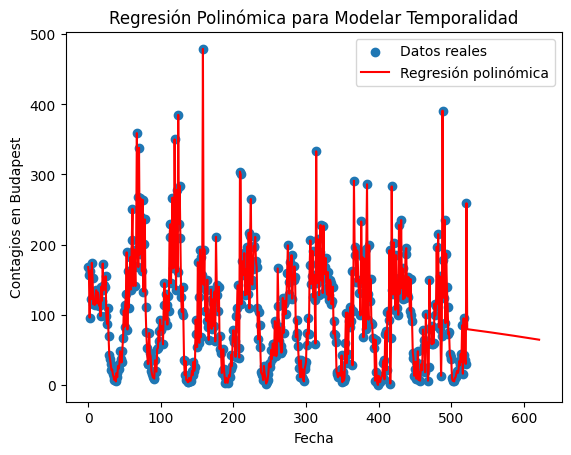

In [ ]:
plt.scatter(df2['NumericDate'], y, label='Datos reales')
plt.plot(np.concatenate([X, X_pred]), np.concatenate([y, y_pred]), color='red', label=f'Regresión polinómica')
plt.title('Regresión Polinómica para Modelar Temporalidad')
plt.xlabel('Fecha')
plt.ylabel('Contagios en Budapest')
plt.legend()
plt.show()

# **AUTOEVALUACIÓN CORTE 3**
Sebastian Florido: 5.0

Carlos Rojas: 5.0